# Perform Facial Recognition with Deep Learning in Keras Using CNN

## DESCRIPTION

Facial recognition is a biometric alternative that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a
face recognition programme with deep convolutional neural networks.
Objective: Use a deep convolutional neural network to perform facial recognition using Keras.
Dataset Details:
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images
per person. The images were taken at different times, lighting and facial expressions. The faces
are in an upright position in frontal view, with a slight left-right rotation.

Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0


## Steps to be followed:
1. Input the required libraries
2. Load the dataset after loading the dataset, you have to normalize every image.
3. Split the dataset
4. Transform the images to equal sizes to feed in CNN
5. Build a CNN model that has 3 main layers:

    * Convolutional Layer
    * Pooling Layer
    * Fully Connected Layer
    

6. Train the model
7. Plot the result
8. Iterate the model until the accuracy is above 90%


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score

In [100]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam


In [74]:
#loading images
images = np.load('ORL_faces.npz') 
images.files

['testY', 'testX', 'trainX', 'trainY']

In [75]:
# loading train & test images and normalizin them from [0, 255] to [0, 1]
xtrain, xtest = images['trainX'], images['testX']

xtrain,xtest = np.array(xtrain)/255, np.array(xtest)/255 

In [76]:
# loading labels
ytrain = images['trainY']
ytest = images['testY']


In [77]:
# print tensors shapes

print("xtrain shape {}".format(xtrain.shape))
print("ytrain shape {}".format(xtrain.shape))
print("xtest shape {}".format(xtest.shape))
print("ytest shape {}".format(ytest.shape))

xtrain shape (240, 10304)
ytrain shape (240, 10304)
xtest shape (160, 10304)
ytest shape (160,)


In [78]:
# splitting the train-images into training and validation images using only 0.05 for testing because the total number of images is very low
xtrain, xvalid, ytrain, yvalid = train_test_split(xtrain, ytrain, test_size =0.05, random_state =1)

In [79]:
#transforming the images to equal sizes to feed in into a CNN
#ORL face database composed of 400 images of size 112 x 92
image_shape = (112,92,1)
#resizing all images
xtrain = xtrain.reshape(xtrain.shape[0], *image_shape)
xvalid = xvalid.reshape(xvalid.shape[0], *image_shape)
xtest = xtest.reshape(xtest.shape[0], *image_shape)

In [80]:
xtrain.shape, xvalid.shape, xtest.shape

((228, 112, 92, 1), (12, 112, 92, 1), (160, 112, 92, 1))

In [81]:
#building a CNN model

model = keras.Sequential(name = "my_Model")

model.add(keras.Input(shape=image_shape))
model.add(layers.Conv2D(filters=64, kernel_size=(7,7), activation="relu",input_shape= image_shape))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=32, kernel_size=(5,5)))

model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(2024, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(20, activation="softmax"))

model.summary()

Model: "my_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 106, 86, 64)       3200      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 53, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 49, 39, 32)        51232     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 19, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 14592)             0         
                                                                 
 dense_4 (Dense)             (None, 2024)              295

In [82]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [83]:
# class for threshold callback

class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

In [50]:
# set threshold for val_accuracy: 90% and stop when reached
#my_callback = MyThresholdCallback(threshold=0.9)


In [84]:

model_train = model.fit(np.array(xtrain),np.array(ytrain),batch_size = 512,
                       epochs=250, verbose=2,
                       #callbacks=[my_callback],
                       validation_data=(np.array(xvalid), np.array(yvalid)),
                       )

Epoch 1/250
1/1 - 3s - loss: 3.0105 - accuracy: 0.0307 - val_loss: 2.9836 - val_accuracy: 0.0000e+00 - 3s/epoch - 3s/step
Epoch 2/250
1/1 - 3s - loss: 2.9863 - accuracy: 0.0614 - val_loss: 2.9808 - val_accuracy: 0.0000e+00 - 3s/epoch - 3s/step
Epoch 3/250
1/1 - 3s - loss: 3.0088 - accuracy: 0.0482 - val_loss: 2.9813 - val_accuracy: 0.0833 - 3s/epoch - 3s/step
Epoch 4/250
1/1 - 3s - loss: 2.9935 - accuracy: 0.0395 - val_loss: 2.9947 - val_accuracy: 0.0000e+00 - 3s/epoch - 3s/step
Epoch 5/250
1/1 - 4s - loss: 2.9692 - accuracy: 0.0570 - val_loss: 3.0058 - val_accuracy: 0.0000e+00 - 4s/epoch - 4s/step
Epoch 6/250
1/1 - 3s - loss: 2.9884 - accuracy: 0.0395 - val_loss: 3.0130 - val_accuracy: 0.0000e+00 - 3s/epoch - 3s/step
Epoch 7/250
1/1 - 3s - loss: 2.9807 - accuracy: 0.0570 - val_loss: 3.0149 - val_accuracy: 0.0000e+00 - 3s/epoch - 3s/step
Epoch 8/250
1/1 - 3s - loss: 2.9712 - accuracy: 0.0789 - val_loss: 3.0190 - val_accuracy: 0.0000e+00 - 3s/epoch - 3s/step
Epoch 9/250
1/1 - 3s - loss:

Epoch 70/250
1/1 - 4s - loss: 0.5144 - accuracy: 0.8509 - val_loss: 0.3479 - val_accuracy: 0.9167 - 4s/epoch - 4s/step
Epoch 71/250
1/1 - 4s - loss: 0.4168 - accuracy: 0.8860 - val_loss: 0.3301 - val_accuracy: 0.9167 - 4s/epoch - 4s/step
Epoch 72/250
1/1 - 4s - loss: 0.4857 - accuracy: 0.8509 - val_loss: 0.2950 - val_accuracy: 0.9167 - 4s/epoch - 4s/step
Epoch 73/250
1/1 - 4s - loss: 0.4394 - accuracy: 0.8816 - val_loss: 0.2662 - val_accuracy: 0.9167 - 4s/epoch - 4s/step
Epoch 74/250
1/1 - 3s - loss: 0.3861 - accuracy: 0.9254 - val_loss: 0.2517 - val_accuracy: 0.9167 - 3s/epoch - 3s/step
Epoch 75/250
1/1 - 4s - loss: 0.3941 - accuracy: 0.8860 - val_loss: 0.2354 - val_accuracy: 0.9167 - 4s/epoch - 4s/step
Epoch 76/250
1/1 - 4s - loss: 0.3889 - accuracy: 0.8816 - val_loss: 0.2266 - val_accuracy: 0.9167 - 4s/epoch - 4s/step
Epoch 77/250
1/1 - 4s - loss: 0.3344 - accuracy: 0.9211 - val_loss: 0.2203 - val_accuracy: 0.9167 - 4s/epoch - 4s/step
Epoch 78/250
1/1 - 4s - loss: 0.3670 - accuracy:

Epoch 139/250
1/1 - 4s - loss: 0.0349 - accuracy: 0.9868 - val_loss: 0.0306 - val_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 140/250
1/1 - 4s - loss: 0.0191 - accuracy: 0.9956 - val_loss: 0.0318 - val_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 141/250
1/1 - 4s - loss: 0.0206 - accuracy: 0.9956 - val_loss: 0.0332 - val_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 142/250
1/1 - 4s - loss: 0.0277 - accuracy: 0.9956 - val_loss: 0.0335 - val_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 143/250
1/1 - 4s - loss: 0.0473 - accuracy: 0.9868 - val_loss: 0.0350 - val_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 144/250
1/1 - 4s - loss: 0.0236 - accuracy: 0.9956 - val_loss: 0.0387 - val_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 145/250
1/1 - 4s - loss: 0.0172 - accuracy: 1.0000 - val_loss: 0.0426 - val_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 146/250
1/1 - 4s - loss: 0.0401 - accuracy: 0.9868 - val_loss: 0.0405 - val_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 147/250
1/1 - 4s - loss: 0.0173 - 

Epoch 208/250
1/1 - 3s - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0276 - val_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 209/250
1/1 - 4s - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 210/250
1/1 - 4s - loss: 0.0113 - accuracy: 0.9956 - val_loss: 0.0323 - val_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 211/250
1/1 - 4s - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0331 - val_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 212/250
1/1 - 4s - loss: 0.0112 - accuracy: 0.9956 - val_loss: 0.0333 - val_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 213/250
1/1 - 4s - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0342 - val_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 214/250
1/1 - 4s - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0344 - val_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 215/250
1/1 - 4s - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0337 - val_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 216/250
1/1 - 4s - loss: 0.0106 - 

In [90]:
print(model_train.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


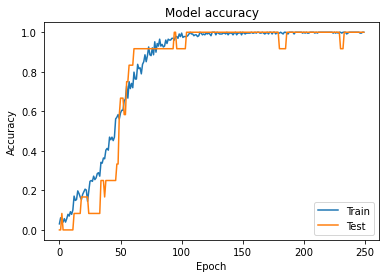

In [93]:
fig, ax = plt.subplots()

plt.plot(model_train.history['accuracy'])
plt.plot(model_train.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

plt.show()

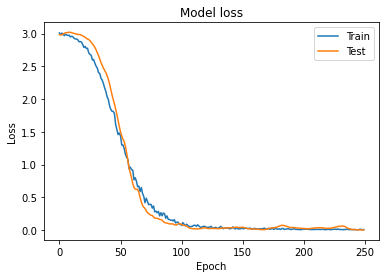

In [94]:
plt.plot(model_train.history['loss'])
plt.plot(model_train.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [98]:
score = model.evaluate( np.array(xtest),  np.array(ytest), verbose=2)

print('Test loss: {:.4f}'.format(score[0]))
print('Test accuracy: {:.4f}'.format(score[1]))

5/5 - 1s - loss: 0.2428 - accuracy: 0.9500 - 510ms/epoch - 102ms/step
Test loss: 0.2428
Test accuracy: 0.9500
